In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt
import modules_TFM as tfm

%matplotlib inline

from invisible_cities.io.pmaps_io import load_pmaps_as_df

### Data Selection

We start by selecting the data we will use for the analysis. To do this, we load both the kdst data and the irene data. The reason for loading the kdst data is to select the events within the diffusion band, again, the selection rules to get these events are the following:

Quick reminder of the diffusion band selection rules:

- Having a S1e higher than 5 pes.
- Having a Zrms lower that 20 $\mu\text{s}$.
- Having a DT lower that 1150 $\mu\text{s}$ (it is to avoid the effect of alphas, this cut does not appear in more recent runs where there are no alphas).
- Being within a certain window of $\text{DT}_{rms}$ according to its DT (goes as a squared root). 
- Those events within the diffusion band are also asked to have just 1 S1

In [3]:
file_kdst = '/Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/data_kdst_merged_14912.h5'
kdst = pd.read_hdf(file_kdst)

In [4]:
pmaps_s2 = []

for ifile in range(1500):
    input_file = f'/Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_{ifile:04d}_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5'
    
    print('Reading file', input_file)

    map_s1, map_s2, *_ = load_pmaps_as_df(input_file) 

    pmaps_s2.append(map_s2)

    print('done')

data_s2 = pd.concat(pmaps_s2, ignore_index=True)

pmaps_filtered_s2 = data_s2[data_s2["event"].isin(kdst.event)]

Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0000_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0001_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0002_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0003_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0004_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0005_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0006_ldc1_trg0.v2.3.1.20250219.Kr.irene.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/irene/trigger0/ldc1/run_14912_0007_ldc1_trg0.v2.3.1.20

Now we will store the events of the dataset whose pmaps we are looking at, and we are going to add an extra cut which is that the valid events within the diffusion cut which have just 1 S2. 

In [5]:
kdst = kdst[kdst["event"].isin(pmaps_filtered_s2.event)]
kdst_1s2 = kdst[kdst.nS2 ==1]
pmaps_1s2 = pmaps_filtered_s2[pmaps_filtered_s2["event"].isin(kdst_1s2.event)]

We are going to see how many events are we left to see if we have enough statistics. We see we have around 34000 events so the statistics should be would enough to keep on going with our analysis. To check if we have also the same amount of events in both pmaps and kdst (this should be always true but it is good to check in case some cuts did not work properly.)

In [6]:
kdst_1s2.event.nunique()

102044

In [7]:
pmaps_1s2.event.nunique()

102044

### Data analysis

As everything seems fine, we are going to fit the S2 events obtained from the pmaps to a gaussian, and use the results from the fit to get the time when this signal was measured and the sigma of the fit will be the rms we will use for computing the diffusion coefficient.

Error on iteration 3


/Users/pablovazquez/miniconda/envs/IC-3.8-2024-06-08/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error on iteration 27
Error on iteration 168
Error on iteration 196
Error on iteration 298
Error on iteration 324
Error on iteration 509
Error on iteration 563
Error on iteration 957
Error on iteration 1246
Error on iteration 1321
Error on iteration 1608
Error on iteration 2461
Error on iteration 2490
Error on iteration 2522
Error on iteration 2645
Error on iteration 3452
Error on iteration 3583
Error on iteration 3589
Error on iteration 3591
Error on iteration 3819
Error on iteration 4041
Error on iteration 4179
Error on iteration 5359
Error on iteration 5502
Error on iteration 6151
Error on iteration 6224


/Users/pablovazquez/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Máster/TFM/modules_TFM.py:409: RuntimeWarning: invalid value encountered in sqrt
  uncertainty_sigma.append(np.sqrt(pcov[2, 2]))


Error on iteration 6679
Error on iteration 8006
Error on iteration 8085
Error on iteration 8339
Error on iteration 8959
Error on iteration 9051
Error on iteration 9342
Error on iteration 9501
Error on iteration 9572
Error on iteration 9725
Error on iteration 9847
Error on iteration 10252
Error on iteration 10534
Error on iteration 10773
Error on iteration 10834
Error on iteration 10838
Error on iteration 11079
Error on iteration 11468
Error on iteration 11484
Error on iteration 12274
Error on iteration 12506
Error on iteration 12722
Error on iteration 12818
Error on iteration 13082
Error on iteration 13480
Error on iteration 13516
Error on iteration 13807
Error on iteration 14050
Error on iteration 14688
Error on iteration 14692
Error on iteration 14808
Error on iteration 14823
Error on iteration 14934
Error on iteration 15988
Error on iteration 16202
Error on iteration 16387
Error on iteration 16557
Error on iteration 16774
Error on iteration 16915
Error on iteration 17572
Error on it

/Users/pablovazquez/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Máster/TFM/modules_TFM.py:408: RuntimeWarning: invalid value encountered in sqrt
  uncertainty_mean.append(np.sqrt(pcov[1, 1]))


Error on iteration 44539
Error on iteration 44918
Error on iteration 45108
Error on iteration 45480
Error on iteration 46129
Error on iteration 46359
Error on iteration 46663
Error on iteration 46758
Error on iteration 47473
Error on iteration 47694
Error on iteration 48061
Error on iteration 48103
Error on iteration 48149
Error on iteration 48320
Error on iteration 48377
Error on iteration 48850
Error on iteration 49224
Error on iteration 49233
Error on iteration 49554
Error on iteration 49701
Error on iteration 49778
Error on iteration 50190
Error on iteration 50463
Error on iteration 50645
Error on iteration 51133
Error on iteration 51390
Error on iteration 51581
Error on iteration 51768
Error on iteration 52294
Error on iteration 52395
Error on iteration 52653
Error on iteration 52849
Error on iteration 53258
Error on iteration 53348
Error on iteration 53596
Error on iteration 53684
Error on iteration 53743
Error on iteration 54182
Error on iteration 54798
Error on iteration 55207


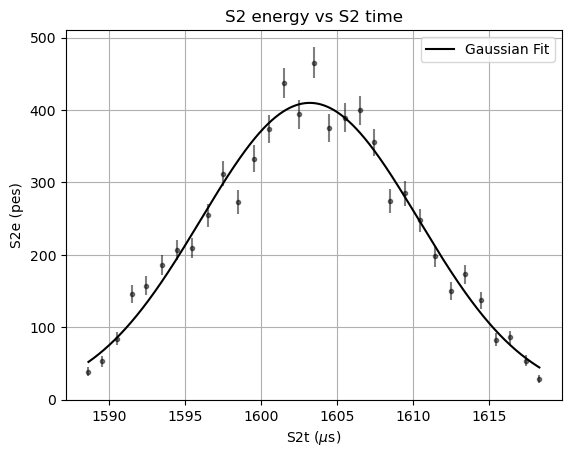

In [8]:
times = []
energies = []

for event, group in pmaps_1s2.groupby("event"):
    times.append(group.time.to_numpy() * 10**-3)  
    energies.append(group.ene.to_numpy())
   
fit_params, mean_uncert, sigma_uncert, fails = tfm.pmap_gaussian(times, energies);

We see some of the fits failed, this could be due some anomalies in the fit. To see how many fits failed and check if this is a big problem, we can make:

In [9]:
100*len(fails)/pmaps_1s2.event.nunique()

0.38904786170671474

And then only $0.377\%$ of the S2 did not fit properly which is not that much of a problem. Now we can store the parameters obtained from the fit in lists we will use from now on in our analyisis.

In [10]:
S2t     = []
sigmas  = []
N       = []

for param in fit_params:
    N.append(param[0])
    S2t.append(param[1])
    sigmas.append(param[2])

It is trivial to compute the drift time

In [11]:
drift_time = (np.array(S2t) - kdst_1s2.S1t.to_numpy()*10**-3)

To check if our calculations are in agreement with the data from the kdst we can plot some distributions. 

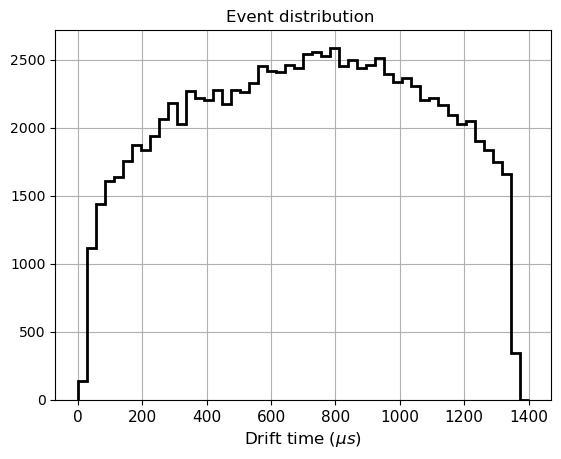

In [12]:
counts, bins_edges, _ = plt.hist(kdst_1s2.DT, bins =50, histtype = 'step', range = (0, 1400), color = 'black',linewidth = 2)
# plt.hist(drift_time, bins =50, histtype = 'step',  density = True, range = (0,1400), linewidth = 2);
plt.grid(True);
plt.xlabel(r'Drift time ($\mu s$)', fontsize = 12);
plt.xticks(fontsize = 11);
plt.yticks(fontsize = 10);
plt.title('Event distribution ');

In [13]:
len(counts/(np.max(kdst_1s2.time)-np.min(kdst_1s2.time))),len(bins_edges)
bins_centers = []
bin_width = []
for i in range(len(bins_edges)-1):
    bins_centers.append((bins_edges[i] + bins_edges[i+1])/2)
    bin_width.append(bins_edges[i+1]-bins_edges[i])


rate = counts/(np.max(kdst_1s2.time)-np.min(kdst_1s2.time))


<BarContainer object of 50 artists>

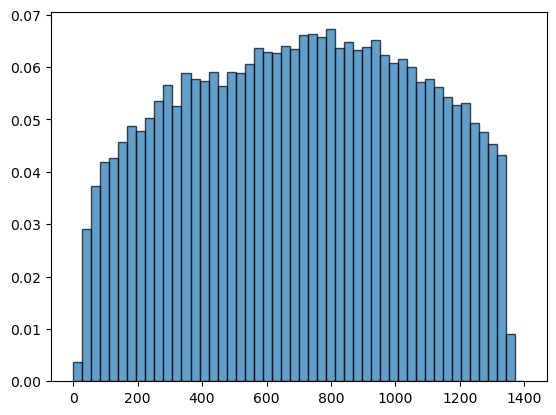

In [14]:
plt.bar(bins_centers, rate, width=bin_width, align='center', 
        edgecolor='black', alpha=0.7, color = None)

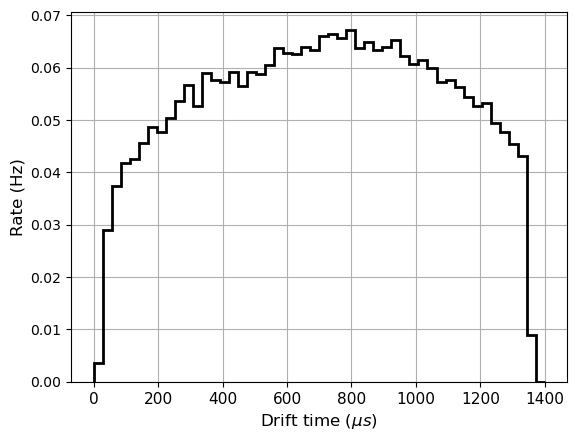

In [15]:
weight = np.ones(len(kdst_1s2.DT))/(np.max(kdst_1s2.time)-np.min(kdst_1s2.time))

counts, bins_edges, _ = plt.hist(kdst_1s2.DT, bins =50, histtype = 'step', weights = weight ,range = (0, 1400), color = 'black',linewidth = 2)
# plt.hist(drift_time, bins =50, histtype = 'step',  density = True, range = (0,1400), linewidth = 2);
plt.grid(True);
plt.xlabel(r'Drift time ($\mu s$)', fontsize = 12);
plt.ylabel(r'Rate (Hz)', fontsize = 12)
plt.xticks(fontsize = 11);
plt.yticks(fontsize = 10);


In [16]:
sum(counts)

2.650925159739435

In [17]:
kdst_1s2

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
15,72,1.741359e+09,0,0,1,1,475.0,1.166440,8.779824,779475.0,...,15,825.002808,825.002808,5.340463,-163.045930,323.790758,362.525075,2.037283,14.133010,14.080160
17,86,1.741359e+09,0,0,1,1,175.0,2.480508,7.603549,661800.0,...,13,938.676941,938.676941,5.659067,-360.436851,254.298326,441.114908,2.527166,12.060048,16.957782
19,100,1.741359e+09,0,0,1,1,225.0,1.595267,7.408753,1339275.0,...,11,263.215271,263.215271,3.075509,374.933796,-189.544064,420.121773,-0.468070,12.102020,11.239236
25,142,1.741359e+09,0,0,1,1,175.0,1.956522,11.640765,589400.0,...,14,1006.121277,1006.121277,5.837768,369.240719,141.807586,395.535207,0.366683,15.515430,17.184313
36,163,1.741359e+09,0,0,1,1,325.0,5.042940,25.360796,562425.0,...,25,1049.066162,1049.066162,6.015315,-193.440178,322.705693,376.242032,2.110798,18.012522,19.366118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1732404,1.741398e+09,0,0,1,1,375.0,2.496265,15.075475,281550.0,...,12,1323.935181,1323.935181,6.476474,25.715473,95.941521,99.328048,1.308919,14.639335,15.723693
200,1732425,1.741398e+09,0,0,1,1,225.0,1.414353,8.959782,878675.0,...,17,722.821533,722.821533,4.611475,-159.483777,337.717086,373.480796,2.011991,14.668459,16.691838
201,1732432,1.741398e+09,0,0,1,1,150.0,1.357367,5.940006,1304850.0,...,15,299.636749,299.636749,3.230686,437.372435,-23.457249,438.001015,-0.053581,13.504142,12.864145
202,1732439,1.741398e+09,0,0,1,1,300.0,1.869766,8.565719,428950.0,...,16,1174.538940,1174.538940,5.870036,398.329971,188.168355,440.538416,0.441319,16.535694,15.430899


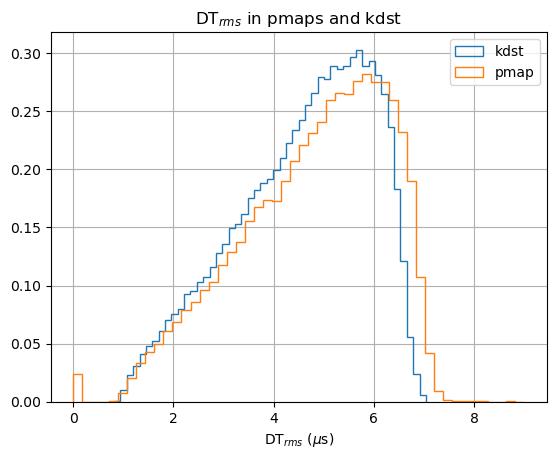

In [18]:
plt.hist(kdst.Zrms, bins = 50, histtype = 'step', density = True, label = 'kdst');
plt.hist(sigmas, bins = 50, histtype = 'step', density = True, label = 'pmap', range = (0,9));
plt.grid(True)
plt.xlabel(r'DT$_{rms}$ ($\mu$s)')
plt.legend();
plt.title(r'DT$_{rms}$ in pmaps and kdst');

We see that the drift time distributions are exactly the same and the fit in that case worked nicely, the rms is not that good due to some residual events (again unsuccesful fits are made to be 0, so we will have some bias to that number)

Let's see if we get similar bands for both the kdst and the pmaps.

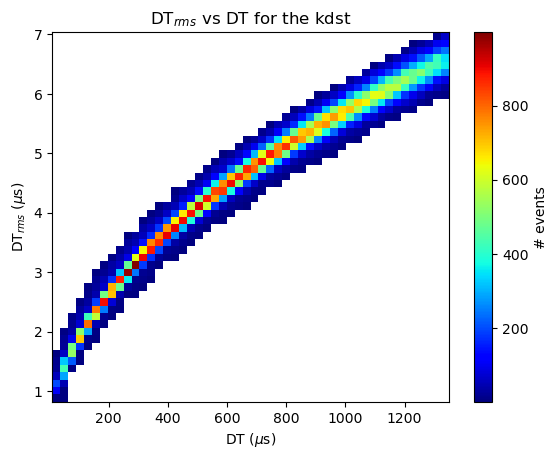

In [19]:
plt.hist2d(kdst_1s2.DT, kdst_1s2.Zrms, bins = 50, cmap = 'jet', cmin = 1);
plt.colorbar(label = '# events');
plt.xlabel(r'DT ($\mu$s)');
plt.ylabel(r'DT$_{rms}$ ($\mu$s)');
plt.title(r'DT$_{rms}$ vs DT for the kdst');

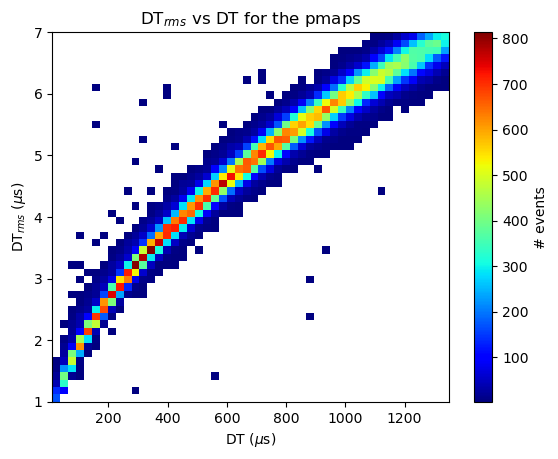

In [20]:
plt.hist2d(drift_time, sigmas, bins = 50, cmap = 'jet', cmin = 2, range = ((10,1350), (1,7)));
plt.colorbar(label = '# events');
plt.xlabel(r'DT ($\mu$s)');
plt.ylabel(r'DT$_{rms}$ ($\mu$s)');
plt.title(r'DT$_{rms}$ vs DT for the pmaps');

Now we just select the events with reasonable widths and times so we can make a nice profile and we compute the diffusion coefficients as we did in the last presentation

In [21]:
valid_drift_time = []
valid_sigma = []
for sigma, dt in zip(sigmas, drift_time):
    if sigma > 0 and sigma <10 and dt >0 and dt < 1400:
        valid_sigma.append(sigma) 
        valid_drift_time.append(dt)

valid_drift_time = np.array(valid_drift_time)
valid_sigma      = np.array(valid_sigma)

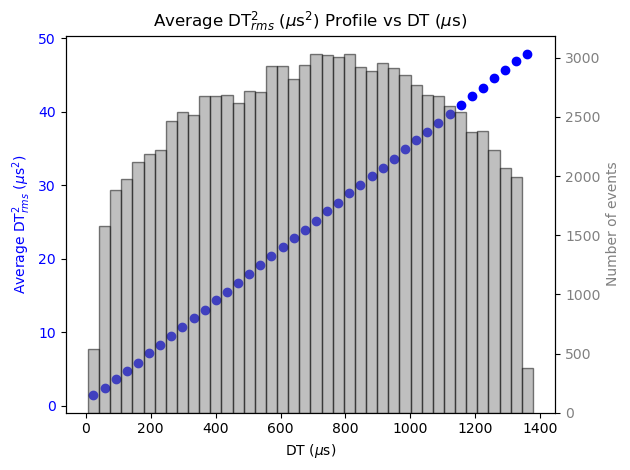

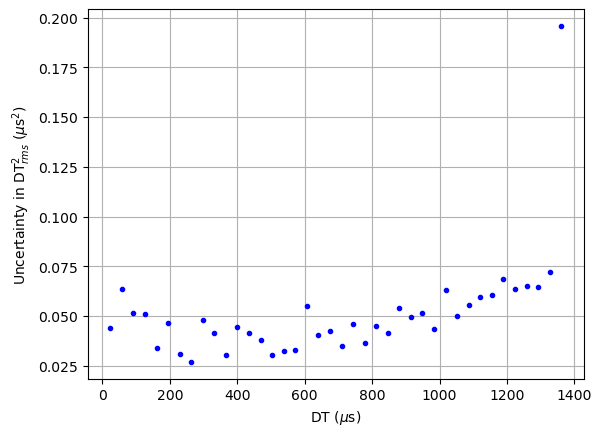

In [22]:
DT_prof, Z_rms_mean_sq, Z_rms_mean_sq_rms = tfm.profiles(valid_drift_time, valid_sigma ** 2 , threshold = 5, n_bins = 40, plot = True, 
                                                         normalize = True, x_label = r'DT ($\mu$s)', y_label = r'DT$^2_{rms}$ ($\mu$s$^2$)');

In [23]:
def recta(x, a, b):
    return a*x+b

drift_velocity=0.865 # mm/ mu s !!!!!
profile_data_L=tfm.Data1d(DT_prof, Z_rms_mean_sq, Z_rms_mean_sq_rms)

profile_data_L.fit(recta, p0=[0,0]);

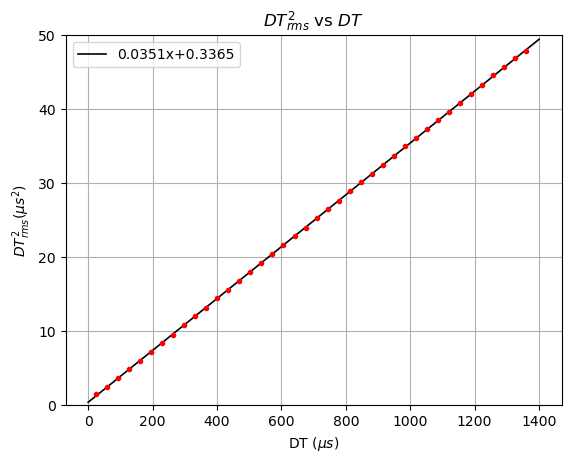

In [24]:
profile_data_L.plot()
plt.plot(np.linspace(0,1400,1000), recta(np.linspace(0,1400,1000), profile_data_L.fit(recta, p0=[0,0])[0][0],
                                        profile_data_L.fit(recta, p0=[0,0])[0][1]), linewidth=1.2, color='black',
                                        label=f'{np.round(profile_data_L.fit(recta, p0=[0,0])[0][0],4)}x+{np.round(profile_data_L.fit(recta, p0=[0,0])[0][1],4)}')
plt.xlabel(r'DT ($\mu s)$')
plt.ylabel(r'$DT_{rms}^2 (\mu s^2)$')
plt.ylim(0,50)
plt.title(r'$DT_{rms}^2$ vs $DT$ ')
plt.legend(loc='upper left')
plt.grid(True)

In [25]:
slope_L=profile_data_L.fit(recta,p0=(0,0))[0][0]
incert_slope_L=np.sqrt(profile_data_L.fit(recta,p0=(0,0))[1][0,0])


print(slope_L)
print(incert_slope_L)

0.03507214476902311
3.2522177627309425e-05


In [26]:
print('La presion reducida es:',4/58.42)
print(r'La temperatura reducida es, suponiendo T=25C:', (273.15+25)/289.733)

print('El factor de compresibilidad es entonces:', 0.971)

P=4
T=25
Z=0.971

La presion reducida es: 0.06846970215679561
La temperatura reducida es, suponiendo T=25C: 1.029050884780125
El factor de compresibilidad es entonces: 0.971


In [27]:
slope = slope_L

DL=slope*drift_velocity**2/2
DLstar=tfm.diffusion_coef(293.15, 0.971, drift_velocity, 4, DL)/2
iDL = tfm.uncert_Dl(incert_slope_L, 0.00016, drift_velocity, slope)

iDLstar = tfm.uncert_Dlstar(iDL, 0.00016, drift_velocity, DL, T, P, Z)
print(f'{DLstar} +- {iDLstar}')

print()
print(f'A campo reducido {114.45/3.96}')

547.950459146544 +- 8.542911446930196

A campo reducido 28.901515151515152


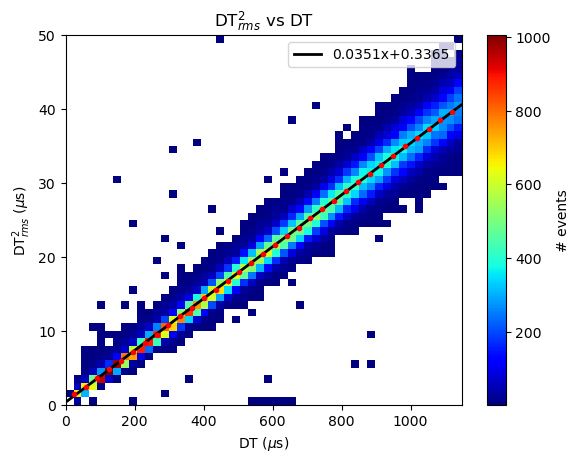

In [28]:
plt.hist2d(valid_drift_time, valid_sigma**2, bins = 50, cmap = 'jet', cmin = 2, range = ((0,1150),(0,50)));
plt.plot(np.linspace(0,1150,1000), recta(np.linspace(0,1150,1000), profile_data_L.fit(recta, p0=[0,0])[0][0],
                                        profile_data_L.fit(recta, p0=[0,0])[0][1]), linewidth=2, color='black',
                                        label=f'{np.round(profile_data_L.fit(recta, p0=[0,0])[0][0],4)}x+{np.round(profile_data_L.fit(recta, p0=[0,0])[0][1],4)}');

profile_data_L.plot()

plt.legend();
plt.colorbar(label = '# events');
plt.xlabel(r'DT ($\mu$s)');
plt.ylabel(r'DT$^2_{rms}$ ($\mu$s)');
plt.title(r'DT$^2_{rms}$ vs DT');

In [29]:
2*np.sin(np.pi/8)**2*np.cos(np.pi/8)**2

0.25

In [30]:
kdst_1s2

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
15,72,1.741359e+09,0,0,1,1,475.0,1.166440,8.779824,779475.0,...,15,825.002808,825.002808,5.340463,-163.045930,323.790758,362.525075,2.037283,14.133010,14.080160
17,86,1.741359e+09,0,0,1,1,175.0,2.480508,7.603549,661800.0,...,13,938.676941,938.676941,5.659067,-360.436851,254.298326,441.114908,2.527166,12.060048,16.957782
19,100,1.741359e+09,0,0,1,1,225.0,1.595267,7.408753,1339275.0,...,11,263.215271,263.215271,3.075509,374.933796,-189.544064,420.121773,-0.468070,12.102020,11.239236
25,142,1.741359e+09,0,0,1,1,175.0,1.956522,11.640765,589400.0,...,14,1006.121277,1006.121277,5.837768,369.240719,141.807586,395.535207,0.366683,15.515430,17.184313
36,163,1.741359e+09,0,0,1,1,325.0,5.042940,25.360796,562425.0,...,25,1049.066162,1049.066162,6.015315,-193.440178,322.705693,376.242032,2.110798,18.012522,19.366118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1732404,1.741398e+09,0,0,1,1,375.0,2.496265,15.075475,281550.0,...,12,1323.935181,1323.935181,6.476474,25.715473,95.941521,99.328048,1.308919,14.639335,15.723693
200,1732425,1.741398e+09,0,0,1,1,225.0,1.414353,8.959782,878675.0,...,17,722.821533,722.821533,4.611475,-159.483777,337.717086,373.480796,2.011991,14.668459,16.691838
201,1732432,1.741398e+09,0,0,1,1,150.0,1.357367,5.940006,1304850.0,...,15,299.636749,299.636749,3.230686,437.372435,-23.457249,438.001015,-0.053581,13.504142,12.864145
202,1732439,1.741398e+09,0,0,1,1,300.0,1.869766,8.565719,428950.0,...,16,1174.538940,1174.538940,5.870036,398.329971,188.168355,440.538416,0.441319,16.535694,15.430899


In [31]:
kdst_1s2.event.nunique()/(np.max(kdst_1s2.time)-np.min(kdst_1s2.time))/3600, kdst_1s2.event.nunique()/(np.max(kdst_1s2.time)-np.min(kdst_1s2.time))


(0.0007363680999276189, 2.650925159739428)

In [32]:
np.max(kdst_1s2.time)

1741397891.884

In [33]:
np.min(kdst_1s2.time)

1741359398.153